In [1]:
import numpy as np
import cv2
import imageio
import matplotlib.pyplot as plt
# importamos deepcopy para copiar objetos
from copy import deepcopy

In [2]:
# cargamos las imagenes:
def load_images(filenames):
    return [imageio.imread(filename) for filename in filenames]

def find_centers(images):
    centers = [cv2.findCirclesGrid(image, (5, 4), None) for image in images]

    return centers

def show_centers(images, centers):
    # mostramos una matriz con las 23 imagenes y los centros encontrados
    images2 = deepcopy(images)
    tmp = [cv2.drawChessboardCorners(img, (5,4), cor[1], cor[0]) for img, cor in zip(images2, centers) if cor[0]]
    # now we show the images in a matrix, 4x6
    fig, ax = plt.subplots(4, 6, figsize=(20, 10))
    for i, image in enumerate(images2):
        ax[i//6, i%6].imshow(image)
        ax[i//6, i%6].axis('off')
        # ponemos el numero de la imagen
        ax[i//6, i%6].set_title(f'Image {i+1}')
    plt.show()
    return images2


def get_circle_centers(patron_shape, dx, dy):
    # patron_shape: (4, 6)
    # dx, dy: distancia entre centros
    points = []
    for i in range(patron_shape[1]):
        for j in range(patron_shape[0]):
            points.append([dx*i, dy*j])
    return np.array(points, dtype=np.float32)

def get_circle_centers2(chessboard_shape, dx, dy):
    return [[(i%chessboard_shape[0])*dx, (i//chessboard_shape[0])*dy, 0] for i in range(np.prod(chessboard_shape))]




In [3]:
filenames = [f'calibracion/img{i}.jpg' for i in range(1,24)]
images = load_images(filenames)

/var/folders/11/8n3x035j1rngnz1l98ysm7vm0000gn/T/ipykernel_235/928236939.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return [imageio.imread(filename) for filename in filenames]


In [4]:
centers = find_centers(images)


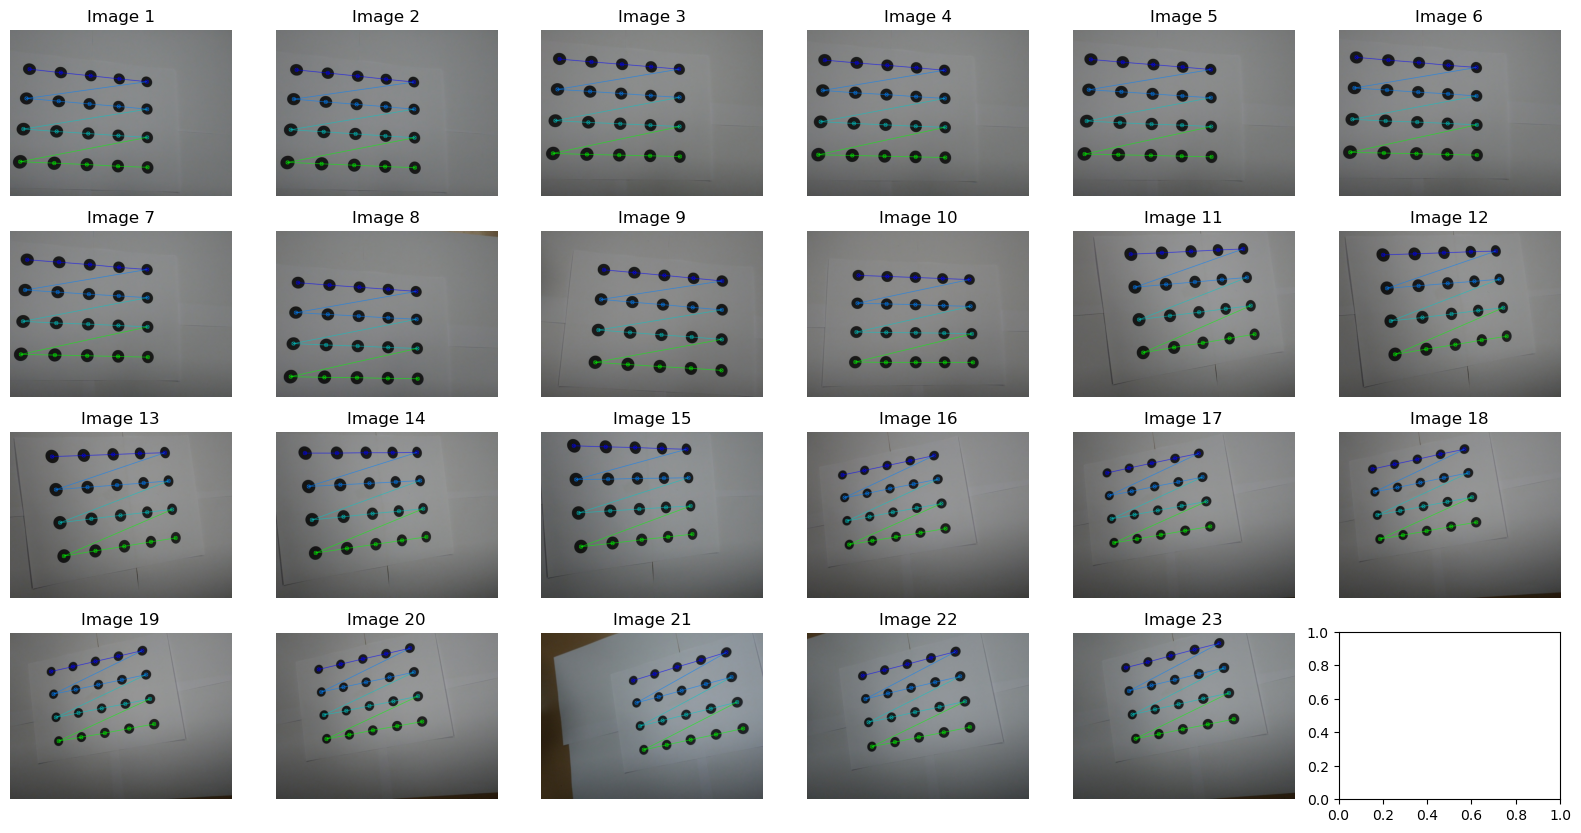

In [5]:
images2 = show_centers(images, centers)

In [7]:
# centers:
valid_centers = [cor[1] for cor in centers if cor[0]]
num_valid_images = len(valid_centers)

# obtain their real points
real_points = get_circle_centers2((5, 4), 20, 20)
real_points = np.asarray([real_points for i in range(num_valid_images)], dtype=np.float32)

# We are going to convert our coordinates list in the reference system to numpy array
object_points = np.asarray([real_points for i in range(num_valid_images)], dtype=np.float32)

# convert the corners list to array
image_points = np.asarray(valid_centers, dtype=np.float32)

# now we calibrate the camera
rms, intrinsics, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(real_points, image_points, images[0].shape[:2], None, None)

extrinsics = list(map(lambda rvec, tvec: np.hstack((cv2.Rodrigues(rvec)[0], tvec)), rvecs, tvecs))

print('Calibration matrix:')
print('-------------------')
print('Intrinsic parameters:')
print(intrinsics, '\n')
print('Distortion coefficients:')
print(dist_coeffs, '\n')
print('Extrinsic parameters:')
print(extrinsics, '\n')
print('RMS:')
print(rms, '\n')

Calibration matrix:
-------------------
Intrinsic parameters:
[[963.99000049   0.         315.69719588]
 [  0.         961.31983307 228.85835581]
 [  0.           0.           1.        ]] 

Distortion coefficients:
[[ 6.94492612e-02 -8.56240698e-01 -1.86174421e-03 -3.81191727e-03
   4.92245679e+00]] 

Extrinsic parameters:
[array([[ 9.70513826e-01, -1.43177150e-02, -2.40619858e-01,
        -5.84910698e+01],
       [ 8.35359856e-02,  9.56350658e-01,  2.80027065e-01,
        -2.56817036e+01],
       [ 2.26107612e-01, -2.91870556e-01,  9.29347581e-01,
         2.18236353e+02]]), array([[ 9.71175662e-01, -1.16544916e-02, -2.38079833e-01,
        -5.78503584e+01],
       [ 8.01475075e-02,  9.56616448e-01,  2.80109531e-01,
        -2.52515838e+01],
       [ 2.24486550e-01, -2.91117064e-01,  9.29976690e-01,
         2.18338244e+02]]), array([[ 9.75431688e-01, -1.20610744e-02, -2.19971708e-01,
        -5.81278973e+01],
       [ 5.54179362e-02,  9.79825342e-01,  1.92018625e-01,
        -3.1785